# Packages and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

# --- Helvetica globally ---
rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "mathtext.fontset": "custom",
    "mathtext.rm": "Helvetica",
    "mathtext.it": "Helvetica:italic",
})
fp_bold = FontProperties(family="Helvetica", weight="bold")
plt.rcParams.update({
    "font.size": 16,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
})

def find_first_life_cycle(R0,NE,NS):
        for i in range(NS, NE+1):
            if R0[i] >= 1:
                return i

        # No crossing in the data
        if R0[-1] > R0[-2]:
            return NE+1
        return -1

def invasion(qB,NU,NE,NS,NL):

    rF=1
    rO=6.8
    g=1#gamma

    ##Spatial dirtribution:
    #pA[i] = proportion of groups of size "i" in environment A (i.e., the upper layer)
    pA=np.zeros(NE+1)
    for i in range(1,NS):
        pA[i]=(1-qB)
    for i in range(NS,NE+1):
        pA[i]=0
    #pB[i] = 1 - pA[i] = proportion of groups of size "i" in environment B (i.e., the lower layer)
    pB=1-pA
    # We do not consider groups of size 0: pA[0]=pB[0]=0 



    #Creating the growth rate arrays
    rA=np.zeros(NE+1) #rA[i]= Growth rate of a cell in a group of size "i" in environment A (i.e., the upper layer)
    rB=np.zeros(NE+1) #rB[i]= Growth rate of a cell in a group of size "i" in environment B (i.e., the lower layer)
    r=np.zeros(NE+1) #r[i]= Average growth rate (across both environments) of a cell in a group of size "i"
    # We do not consider groups of size 0: rA[0]=rB[0]=r[0]=0 

    #Assigning values to the growth rate arrays
    for i in range(1,NE+1):
        if i<=NU:
            rA[i]= rO
        else:
            rA[i]=(rO*NU + rF*(i-NU))/i

        if i<=NL:
            rB[i]= rO
        else:
            rB[i]=(rO*(NL) + rF*(i-NL))/i

        r[i]= rA[i]*pA[i] + rB[i]*pB[i]

    #R0 calculation
    K_T=r[1]/(g*(pA[1]**2 + pB[1]**2))

    K_up=K_T*pA[1] #Number of cells in the upper layer
    K_low=K_T*pB[1] #Number of cells in the lower layer

    C_l=[0] #competition experienced by a group of size "i". There are no groups of size 0, then C_l[0]=0
    for i_C in np.arange(NE)+1:
        if i_C<NS:
            C_l.append(g*(pA[i_C]*K_up + pB[i_C]*K_low))
        else:
            C_l.append(g*K_low)

    R0=[0,r[1]/(C_l[1])] #R0[i]= R0 of a i+1 life cycle. 0+1 does not exist, then R0[0]= 0. R0[1]= r[1]/Cl[0].

    #The R0's of the other life cycles can be obtained iteratevely:
    if K_low!=0:
        for n in range(2,NE+1):
            R0_n=(R0[n-1]/((n-1)*r[n-1]/(C_l[n-1])))*((n-1)*r[n-1]/((n-1)*r[n-1] + C_l[n-1]))*(n*r[n]/(C_l[n]))
            R0.append(R0_n)

    else: #If there are no groups in the lower layer, the basic reproduction number for n>NS goes to infinity as long as r>0.
            #Since we only care whether R0>1 or R0<1, we set R0[i>=NS]=2
        for n in range(2,NS):
            R0_n=(R0[n-1]/((n-1)*r[n-1]/(C_l[n-1])))*((n-1)*r[n-1]/((n-1)*r[n-1] + C_l[n-1]))*(n*r[n]/(C_l[n]))
            R0.append(R0_n)
        for n in range(NS,NE+1):
            R0.append(2)


    #pl.plot(R0)
    #pl.plot([1,NE],[1,1],'k')
    #pl.show()
    return find_first_life_cycle(R0,NE,NS)


def R0(qB,NU,NE,NS,NL):

    rF=1
    rO=6.8
    g=1#gamma
    #Maximal group size

    ##Spatial dirtribution:
    #pA[i] = proportion of groups of size "i" in environment A (i.e., the upper layer)
    pA=np.zeros(NE+1)
    for i in range(1,NS):
        pA[i]=(1-qB)
    for i in range(NS,NE+1):
        pA[i]=0
    #pB[i] = 1 - pA[i] = proportion of groups of size "i" in environment B (i.e., the lower layer)
    pB=1-pA
    # We do not consider groups of size 0: pA[0]=pB[0]=0 



    #Creating the growth rate arrays
    rA=np.zeros(NE+1) #rA[i]= Growth rate of a cell in a group of size "i" in environment A (i.e., the upper layer)
    rB=np.zeros(NE+1) #rB[i]= Growth rate of a cell in a group of size "i" in environment B (i.e., the lower layer)
    r=np.zeros(NE+1) #r[i]= Average growth rate (across both environments) of a cell in a group of size "i"
    # We do not consider groups of size 0: rA[0]=rB[0]=r[0]=0 

    #Assigning values to the growth rate arrays
    for i in range(1,NE+1):
        if i<=NU:
            rA[i]= rO
        else:
            rA[i]=(rO*NU + rF*(i-NU))/i

        if i<=NL:
            rB[i]= rO
        else:
            rB[i]=(rO*(NL) + rF*(i-NL))/i

        r[i]= rA[i]*pA[i] + rB[i]*pB[i]

    #R0 calculation
    K_T=r[1]/(g*(pA[1]**2 + pB[1]**2))

    K_up=K_T*pA[1] #Number of cells in the upper layer
    K_low=K_T*pB[1] #Number of cells in the lower layer

    C_l=[0] #competition experienced by a group of size "i". There are no groups of size 0, then C_l[0]=0
    for i_C in np.arange(NE)+1:
        if i_C<NS:
            C_l.append(g*(pA[i_C]*K_up + pB[i_C]*K_low))
        else:
            C_l.append(g*K_low)

    R0=[0,r[1]/(C_l[1])] #R0[i]= R0 of a i+1 life cycle. 0+1 does not exist, then R0[0]= 0. R0[1]= r[1]/Cl[0].

    #The R0's of the other life cycles can be obtained iteratevely:
    if K_low!=0:
        for n in range(2,NE+1):
            R0_n=(R0[n-1]/((n-1)*r[n-1]/(C_l[n-1])))*((n-1)*r[n-1]/((n-1)*r[n-1] + C_l[n-1]))*(n*r[n]/(C_l[n]))
            R0.append(R0_n)

    else: #If there are no groups in the lower layer, the basic reproduction number for n>NS goes to infinity as long as r>0.
            #Since we only care whether R0>1 or R0<1, we set R0[i>=NS]=2
        for n in range(2,NS):
            R0_n=(R0[n-1]/((n-1)*r[n-1]/(C_l[n-1])))*((n-1)*r[n-1]/((n-1)*r[n-1] + C_l[n-1]))*(n*r[n]/(C_l[n]))
            R0.append(R0_n)
        for n in range(NS,NE+1):
            R0.append(2)

    return R0



# Produce and Plot Figure S5

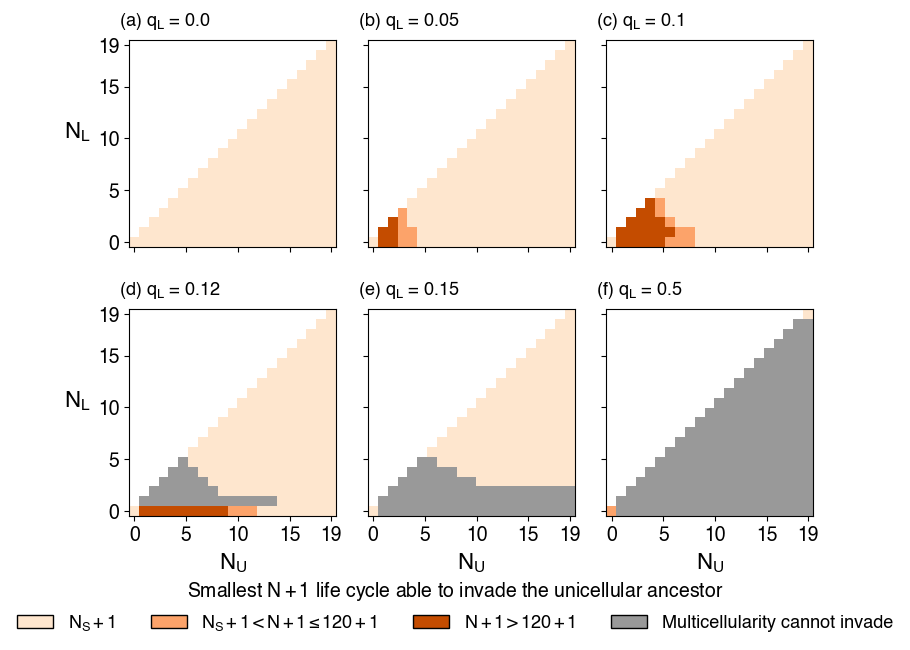

In [10]:
NE = 120
NS = 20

#Grid setup
nu_min, nu_max = 0.0, 20
nl_min, nl_max = 0.0, 20
nu_points = 21
nl_points = 21

nu_vals = np.linspace(nu_min, nu_max, nu_points)
nl_vals = np.linspace(nl_min, nl_max, nl_points)

# Discrete colormap
cmap = ListedColormap([
    "#FFFFFF",  # 0 white: N_L > N_U or inv < N_S
    "#fee6ce" ,  # 1 light blue: inv == N_S
    "#fca36a",  # 2 blue: N_S < inv <= N_E
    "#c44c00",  # 3 dark blue: inv >= N_E
    "0.6",      # 4 gray: inv == -1
])
#"#fee6ce", "#f16913"

#Classifier over the grid for a given qB
def classify_grid(qB):
    C = np.zeros((nl_points, nu_points), dtype=int)
    for j, NL in enumerate(nl_vals):
        for i, NU in enumerate(nu_vals):
            if NL > NU:
                C[j, i] = 0  # white: N_L > N_U

            else:
                inv = invasion(qB, NU, NE, NS, NL)
                if not np.isfinite(inv):
                    C[j, i] = 0
                elif abs(inv + 1) <= 0:
                    C[j, i] = 4  # gray: invasion == -1
                elif inv==-1:
                    C[j, i] = 0  # white: below N_S (no invasion)
                elif inv == NS:
                    C[j, i] = 1  # light blue: invasion == N_S
                elif NS < inv <= NE:
                    C[j, i] = 2  # blue: NS < invasion <= N_E
                elif inv>NE:
                    C[j, i] = 3  # dark blue: invasion >= N_E
    return C

# Scenarios and subplot layout
qB_list = [0., 0.05, 0.1, 0.12, 0.15, 0.5]
letters = ['a', 'b', 'c', 'd', 'e', 'f']

fig, axes = plt.subplots(2, 3, figsize=(13, 7), constrained_layout=False)

for idx, (qB, letter) in enumerate(zip(qB_list, letters)):
    r, c = divmod(idx, 3)
    ax = axes[r, c]

    C = classify_grid(qB)
    im = ax.imshow(
        C,
        extent=[nu_min, nu_max, nl_min, nl_max],
        origin="lower",
        aspect="equal",
        cmap=cmap,
        interpolation="nearest",
        vmin=0, vmax=4
    )

    ax.set_title("")  
    ax.text(
        -0.05, 1.04, rf"$\mathbf{{({letter})}}$ $q_L$ = {qB}",
        transform=ax.transAxes,
        fontsize=13,
        fontproperties=fp_bold, 
        ha="left",
        va="bottom"
    )


    xticks = [0.5,5.5,10.5,15.5,19.5]
    yticks = [0.5,5.5,10.5,15.5,19.5]
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels([0,5,10,15,19])
    ax.set_yticklabels([0,5,10,15,19])

    # Axis labels only on left column (y) and bottom row (x)
    if c == 0:
        ax.set_ylabel(r"$N_L$",rotation=0, labelpad=15)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    if r == 1:
        ax.set_xlabel(r"$N_U$")
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])


plt.subplots_adjust(bottom=0.20, wspace=-0.55, hspace=0.3)


legend_patches = [
    mpatches.Patch(facecolor="#fee6ce", edgecolor="black", label=r"$N_S+1$"),
    mpatches.Patch(facecolor="#fca36a", edgecolor="black", label=r"$N_S+1 < N+1 \leq 120+1$"),
    mpatches.Patch(facecolor="#c44c00", edgecolor="black", label=r"$N+1 > 120+1$"),
    mpatches.Patch(facecolor="0.6", edgecolor="black", label=r"Multicellularity cannot invade"),
]


leg = fig.legend(
    handles=legend_patches,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.01),
    frameon=False,
    ncol=4,
    fontsize=13,
    title="Regions",
)
leg.set_title("Smallest $N+1$ life cycle able to invade the unicellular ancestor",
              prop={"size": 14, "weight": "bold"})

plt.show()

fig.savefig("FigS5.pdf", format="pdf", bbox_inches="tight")

